## Deep Learning Project

### Build a digit recognition program

In this project we are going to design and implement a deep learning model that recognize the digit which is written in fast way. 

We will use Keras package to do this.

### Data Set Information:

1593 handwritten digits from around 80 persons were scanned, stretched in a rectangular box 16x16 in a gray scale of 256 values.Then each pixel of each image was scaled into a bolean (1/0) value using a fixed threshold. 

Each person wrote on a paper all the digits from 0 to 9, twice. The commitment was to write the digit the first time in the normal way (trying to write each digit accurately) and the second time in a fast way (with no accuracy). 

The best validation protocol for this dataset seems to be a 5x2CV, 50% Tune (Train +Test) and completly blind 50% Validation

### Attribute Information:

This dataset consists of 1593 records (rows) and 256 attributes (columns). 

Each record represents a handwritten digit, orginally scanned with a resolution of 256 grays scale (28). 

Each pixel of the each original scanned image was first stretched, and after scaled between 0 and 1 (setting to 0 every pixel whose value was under tha value 127 of the grey scale (127 included) and setting to 1 each pixel whose orinal value in the grey scale was over 127). 

Finally, each binary image was scaled again into a 16x16 square box (the final 256 binary attributes).

### Implementation:
First we will import all required modules

In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Reading the dataset
data = pd.read_csv("Data/semeion.data",sep= " ", header = None)

In [3]:
# Inspecting the data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
data.shape

(1593, 267)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 267 entries, 0 to 266
dtypes: float64(257), int64(10)
memory usage: 3.2 MB


In [7]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
       ... 
237       0
238       0
239       0
240       0
241       0
242       0
243       0
244       0
245       0
246       0
247       0
248       0
249       0
250       0
251       0
252       0
253       0
254       0
255       0
256       0
257       0
258       0
259       0
260       0
261       0
262       0
263       0
264       0
265       0
266    1593
Length: 267, dtype: int64

In [4]:
# from above we could see all the rows are null for the column '266', so we are dropping it
data = data.drop(data.columns[266],axis=1)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# We are seperating the predictors and labels
X = data.loc[:,:255] #Ideally the input
y = data.loc[:,256:] # Ideally the output/target

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


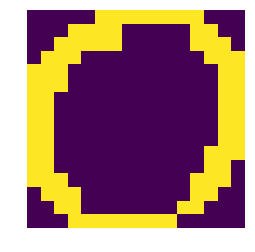

In [7]:
# Just seeing which digit exists in one of the input
img = np.reshape(X.loc[1,:255],(16,16))
plt.axis('off')
plt.imshow(img)

In [8]:
# Splitting the training data into train and test data, based on dataset information am using 50% split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.5, random_state = 4)
# most of the deep learning models best work on vectors are arrays. So we are converting the data into numpy array and model expects 4D vector so we are reshaping it 
# based on attribute information we are using 16X16 dimensions
x_train=np.array (x_train).reshape(-1,16,16,1)
x_test = np.array(x_test).reshape(-1,16,16,1)

In [9]:
x_train.shape

(796, 16, 16, 1)

## Building the model
### Here I am using Keras Sequential model (linear stack of layers). You can learn more about this here https://keras.io/getting-started/sequential-model-guide/
### I have added 2 conv2D layers with filters 16, 32 and kernal size of 3 with padding.
### Using Maxpooling2D with pool size 2, it will help to reduce the computations between the layers with minimal loss of information
### Drop out is to reduce the overfitting in training model
### ReLu activation function is used : Rectified Linear activation (To reduce the non linearity at neuron in network)
                    
                     ReLu(x) = { 0 when x<0 and x when x>=0}
### Fully connected layer is defined with Dense layer. Before sending the data into fully connected we should flatten the data. It will convert the data into 1D vector which is expected by fully connected layer
### Last layer is called output layer: This layer always should have the number equals to labels count. If it is binary classification we can use sigmoid, if more than 2 classification we always use softmax as the activation function. 

In [10]:
input_shape = (16, 16, 1)
num_classes = 10 # length of target
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape,padding = 'same'))
model.add(Conv2D(32, (3,3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [11]:
# looking into summary of above created model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

### Usually the target variable always should be one hot encoded before sending into the model.
### But here we are not doing this because in the dataset it is already mentioned that target data is encoded for us.
### we can use below code to do one-hot encoding if it is not already encoded
                # Convert labels to categorical one-hot encoding
                one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

In [12]:
batch_size = 75
epochs =20

In [13]:
# here we are compiling the model (Back propagation).It is to reduce the error and optimizing our model better
# We can use different kind of optimizers: so many are available (Adam is mostly used one)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

In [14]:
# Finally going to train the model which created earlier and validating across validation data.
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), validation_split = 0.5)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 796 samples, validate on 797 samples
Epoch 1/20
796/796 [==============================] - 2s 3ms/step - loss: 2.0418 - acc: 0.2940 - val_loss: 1.1205 - val_acc: 0.6562
Epoch 2/20
796/796 [==============================] - 1s 2ms/step - loss: 1.2016 - acc: 0.5867 - val_loss: 0.6559 - val_acc: 0.7992
Epoch 3/20
796/796 [==============================] - 1s 2ms/step - loss: 0.7156 - acc: 0.7676 - val_loss: 0.4220 - val_acc: 0.8946
Epoch 4/20
796/796 [==============================] - 2s 2ms/step - loss: 0.5716 - acc: 0.8216 - val_loss: 0.2801 - val_acc: 0.9084
Epoch 5/20
796/796 [==============================] - 1s 2ms/step - loss: 0.4745 - acc: 0.8417 - val_loss: 0.2516 - val_acc: 0.9260
Epoch 6/20
796/796 [==============================] - 1s 2ms/step - loss: 0.4083 - acc: 0.8643 - val_loss: 0.2039 - val_acc: 0.9360
Epoch 7/20
796/796 [==============================] - 1s 2ms/step - loss: 0.3425 - acc: 0.8995 - val_loss: 0.1940 - val_acc: 0.9385
Epoch 8/20
796/796 [==========

#### We got 96% accuracy on test data. So let's go ahead and predict the data and validate it

In [15]:
pred = model.predict(x_test)

In [18]:
pred.argmax(axis=1)

array([4, 4, 0, 0, 2, 2, 3, 7, 7, 6, 3, 6, 8, 2, 8, 8, 2, 1, 5, 3, 3, 4,
       4, 1, 0, 5, 5, 4, 5, 8, 5, 3, 8, 0, 6, 3, 7, 0, 0, 5, 6, 6, 0, 0,
       6, 1, 2, 9, 8, 2, 0, 7, 3, 9, 9, 8, 8, 4, 6, 9, 8, 0, 9, 9, 3, 4,
       4, 1, 7, 5, 1, 3, 3, 6, 5, 5, 6, 6, 3, 6, 3, 5, 9, 0, 8, 2, 4, 8,
       9, 8, 1, 0, 5, 4, 3, 2, 9, 6, 7, 3, 0, 2, 0, 4, 1, 2, 3, 5, 8, 8,
       6, 8, 0, 5, 6, 7, 9, 1, 8, 6, 7, 8, 4, 0, 5, 4, 8, 4, 2, 2, 3, 5,
       2, 6, 6, 2, 1, 8, 4, 3, 1, 3, 3, 1, 9, 1, 2, 6, 8, 3, 0, 7, 6, 6,
       8, 1, 0, 5, 1, 8, 1, 1, 3, 5, 7, 2, 5, 3, 8, 5, 4, 1, 4, 8, 4, 1,
       7, 7, 0, 4, 4, 6, 0, 7, 1, 0, 1, 2, 6, 4, 6, 3, 6, 5, 3, 7, 6, 4,
       0, 4, 6, 3, 0, 9, 7, 1, 2, 4, 4, 0, 0, 9, 7, 0, 0, 4, 1, 6, 7, 1,
       3, 8, 1, 4, 3, 4, 0, 1, 8, 6, 0, 1, 9, 2, 5, 1, 5, 9, 2, 7, 6, 4,
       4, 5, 8, 9, 8, 5, 1, 8, 6, 6, 2, 3, 8, 9, 3, 0, 2, 4, 7, 3, 0, 4,
       7, 4, 8, 9, 0, 3, 1, 5, 4, 4, 4, 4, 1, 6, 9, 1, 0, 2, 6, 0, 3, 9,
       4, 5, 6, 2, 8, 3, 9, 9, 5, 4, 5, 0, 9, 2, 2,

In [20]:
import random

In [21]:
#Printing some examples of real and predicted labels
for i in range(0,5):
    
    actual_labels = []
    predicted_labels = []
    
    for j in range(0,5):
        #print(j,i)
        n = random.randrange(0, x_test.shape[0])
        actual_labels.append(np.argmax(y_test.values[n]))
        predicted_labels.append(np.argmax(pred[n]))
        
    print("Actual labels: {}".format(actual_labels))
    print("Predicted labels: {}\n".format(predicted_labels))

Actual labels: [1, 7, 8, 8, 6]
Predicted labels: [1, 7, 8, 8, 6]

Actual labels: [6, 6, 5, 3, 0]
Predicted labels: [6, 6, 5, 3, 0]

Actual labels: [1, 6, 4, 8, 6]
Predicted labels: [1, 6, 4, 8, 6]

Actual labels: [7, 3, 2, 9, 4]
Predicted labels: [7, 3, 2, 9, 4]

Actual labels: [0, 9, 0, 3, 4]
Predicted labels: [0, 9, 0, 3, 4]



#### From above we got both actual and predicted values are matching. That sound's great

In [25]:
# Predicted digit
pred.argmax(axis=1)[1]

4

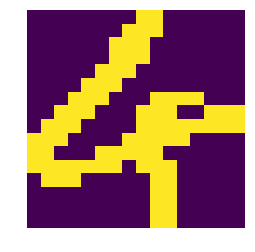

In [26]:
# Actual digit # Both are matching :)
img = np.reshape(x_test[1:2,:255],(16,16))
plt.axis('off')
plt.imshow(img)

### Analysing the accuracy and loss between training and validation data

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0,epochs)

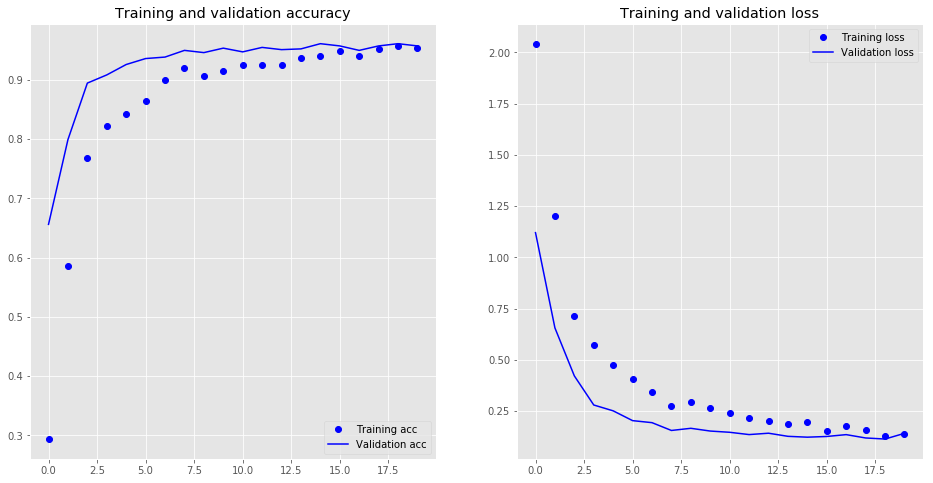

In [29]:
fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[0].plot(epoch, acc, 'bo', label='Training acc')
axes[0].plot(epoch, val_acc, 'b', label='Validation acc')
axes[0].set_title('Training and validation accuracy')
axes[0].legend()

axes[1].plot(epoch, loss, 'bo', label='Training loss')
axes[1].plot(epoch, val_loss, 'b', label='Validation loss')
axes[1].set_title('Training and validation loss')
axes[1].legend()